In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
# %matplotlib inline

In [2]:
path = '../female/'
dire = os.listdir(path)

In [3]:
dis = []
for items in dire:
    items = items.split('_')
    try:
        dis.append(items[1])
    except:
        print(items)

['error']


In [4]:
dire[1].split('_')

['1', 'B.baria', '25', '3', '00084.jpg']

In [5]:
df = pd.DataFrame({'Dis': dis})

In [6]:
df.describe()

,Dis
count,86
unique,44
top,Bog
freq,6


In [7]:
grouped = df.groupby('Dis')
sr = pd.Series(data=dis, index=None, dtype=None, name=None, copy=False, fastpath=False)

In [8]:
df['Dis'].value_counts()

Bog        6
Com        6
Noa        5
Dha        5
Chad       4
Nar        4
Tha        3
Din        3
Bar        3
Gaz        2
Mym        2
Bhola      2
Mun        2
Jamal      2
Shar       2
Manik      2
Syl        2
Sher       2
Jes        2
Raj        2
B.baria    2
Mad        1
Ran        1
Rajb       1
Tan        1
Rang       1
Savar      1
Gop        1
nar        1
Farid      1
Pan        1
Cand       1
Khus       1
Naw        1
Nao        1
khali      1
pan        1
Khali      1
Nars       1
said       1
Pabna      1
Ctg        1
com        1
Shir       1
Name: Dis, dtype: int64

In [9]:
xv = df["Dis"].value_counts(dropna=False)

In [10]:
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
import cufflinks as cf

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [11]:
type(xv)
! --NotebookApp.iopub_data_rate_limit

'--NotebookApp.iopub_data_rate_limit' is not recognized as an internal or external command,
operable program or batch file.


In [12]:
import plotly as py
import plotly.graph_objs as go

import pandas as pd
import numpy as np

# df.head()

data = [
    go.Bar(
        x=xv.index, # assign x as the dataframe column 'x'
        y=xv.values
    )
]

# IPython notebook
py.offline.plot(data)


'file://C:\\Users\\shaha\\Desktop\\data processing\\DataProcessingScript\\temp-plot.html'

#### Move file

In [70]:
import shutil
path = '../test/'
move = path + 'move/'

for i in range(0,10):
    pathN = path+'/'+str(i)+'/'
    dirr = os.listdir(pathN)
    for items in dirr:
        item = items.split('_')
        try:
            if item[1] == 'Dha':
                shutil.move(pathN+items, move+'Dhaka/'+str(i)+'/'+items)
                
            elif item[1] == 'Tan':
                shutil.move(pathN+items, move+'Tang/'+str(i)+'/'+items)
            
            elif item[1] == 'Com':
                shutil.move(pathN+items, move+'Com/'+str(i)+'/'+items)
            
            elif item[1] == 'Chan':
                shutil.move(pathN+items, move+'Chan/'+str(i)+'/'+items)
                
            elif item[1] == 'Bog':
                shutil.move(pathN+items, move+'BOg/'+str(i)+'/'+items)
        except Exception as e:
            print(e)
        

In [34]:
import numpy as np

from PIL import Image 
import PIL.ImageOps
import csv

class Process:

    def __init__(self,path,invert=True):
        self.path = path
        self.invert = invert
        
    def getData(self):
        image = Image.open(self.path)
#         image = process_image_for_ocr(self.path)
        image = image.resize((28,28), Image.ANTIALIAS).convert('L')
        if self.invert is False:
            image = PIL.ImageOps.invert(image)
            pixels = np.asarray(image)
#             pixels = pixels/255.0
            pixels = pixels.reshape(-1,28,28,1)
        else:
            pixels = np.asarray(image)
            pixels = pixels.reshape(-1,28,28,1) 
        return pixels

In [35]:
acc2 = {'Bog':[], 'Chan':[], 'Com':[], 'Dhaka':[], 'Tang':[]}

In [36]:
from keras.models import load_model
model = load_model('9261test9911bncmtdb1.5per.h5')

In [ ]:
acc2 = {'M':[], 'F':[], 'Com':[], 'Dhaka':[], 'Tang':[]}

In [41]:
import time
z = time.time()
predict = []
real = []
import os

# path = '../test/move/'
# dirs = os.listdir(path)
# for p in dirs:
# #     predict = []
# #     real = []
path = '../male/Data/M/main120/'
try:
    for i in range(0,10):
        newPath=path+str(i+110)+'/'
        dirr = os.listdir(newPath)
        for items in dirr:
            a = Process(newPath+items,invert=False)
            a = a.getData()
            a = np.argmax(model.predict(a))
            real.append(i)
            predict.append(a)

#         acc2[p].append(accuracy_score(Y_test,results) )
except Exception as e:
    print(e)
zz = time.time()
zz-z

22.944100856781006

In [158]:
print(np.mean(acc2['Dhaka']))
print(np.mean(acc2['Tang']))
print(np.mean(acc2['Bog']))
print(np.mean(acc2['Com']))
print(np.mean(acc2['Chan']))

0.9475
0.985
0.985
0.9775
0.9825


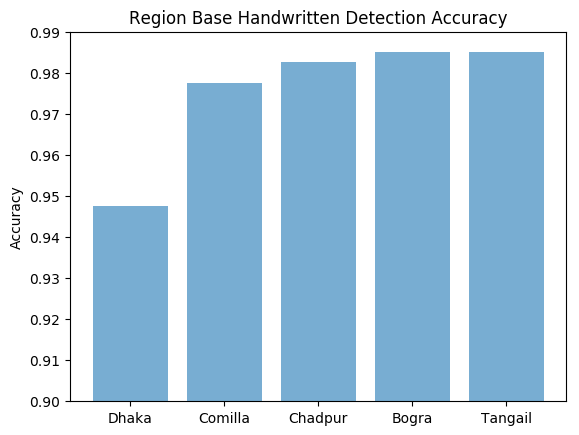

In [201]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Dhaka', 'Comilla', 'Chadpur', 'Bogra', 'Tangail')
y_pos = np.arange(len(objects))
performance = [0.9475,0.9775,0.9825,0.985,0.985]
 
plt.bar(y_pos, performance, align='center', alpha=0.6)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Region Base Handwritten Detection Accuracy')
plt.ylim(.9,.99)
plt.show()

In [42]:
Y_test = np.array(real)
results = np.array(predict)
print(len(Y_test))
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import log_loss,mean_squared_error,precision_recall_fscore_support
print('Accuracy score',accuracy_score(Y_test,results))
print('mean_squared_error',mean_squared_error(Y_test,results))
print('classification_report\n',classification_report(Y_test,results))
print('confusion_matrix\n',confusion_matrix(Y_test,results))
# Accuracy score 0.976744186047
# Accuracy score 0.968604651163

3060
Accuracy score 0.967973856209
mean_squared_error 0.929738562092
classification_report
              precision    recall  f1-score   support

          0       1.00      0.96      0.98       306
          1       0.96      0.92      0.94       306
          2       0.99      0.99      0.99       306
          3       0.97      0.96      0.96       306
          4       0.98      0.98      0.98       306
          5       0.97      0.97      0.97       306
          6       0.95      0.98      0.96       306
          7       0.99      0.98      0.98       306
          8       0.97      0.98      0.97       306
          9       0.91      0.96      0.94       306

avg / total       0.97      0.97      0.97      3060

confusion_matrix
 [[293   1   0   6   1   0   0   0   2   3]
 [  0 283   2   1   0   0   0   0   0  20]
 [  0   0 303   0   0   1   0   1   1   0]
 [  0   1   0 293   0   1   9   0   2   0]
 [  0   1   0   0 299   2   2   0   2   0]
 [  0   0   0   0   1 298   3   1   

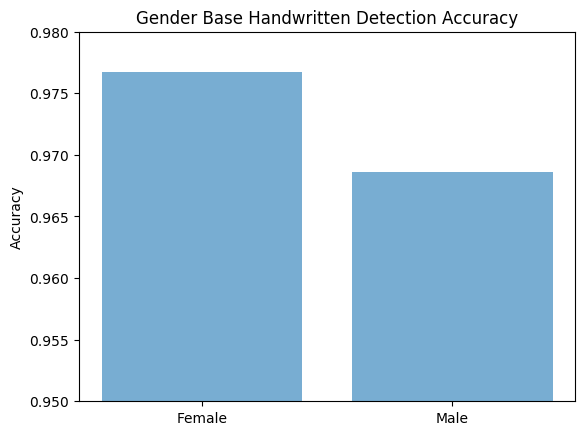

In [1]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Female', 'Male')
y_pos = np.arange(len(objects))
performance = [0.976744186047,0.968604651163]
 
plt.bar(y_pos, performance, align='center', alpha=0.6)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Gender Base Handwritten Detection Accuracy')
plt.ylim(.95,.98)
plt.show()

In [55]:
path = '../test/move/'
dirr = os.listdir(path)
print(dirr)

['.ipynb_checkpoints', 'Bog', 'Chan', 'Com', 'Dhaka', 'Tang', 'Untitled.ipynb']


In [54]:
# import time
# z = time.time()
# predict = []
# real = []
# path = '../test/move/Dhaka/0/'
# # newPath=path+str(i)+'/'
# dirr = os.listdir(path=path)
# for items in dirr:
#     a = Process(newPath+items,invert=False)
#     a = a.getData()
#     a = np.argmax(model.predict(a))
# #     real.append(i)
#     predict.append(a)


import time
z = time.time()
predict = []
real = []
path = '../test/move/Bog/0/0_Bog_21_3_00235.jpg'
# path = 'Untitled.jpg'
# newPath=path+str(i)+'/'
# dirr = os.listdir(path=path)
a = Process(path,invert=False)
a = a.getData()
print(np.argmax(model.predict(a)))
#     real.append(i)
# print(a)

0


In [24]:
# best = 0
# maxsize = 0
# count = 0
# # for cnt in contours:
# #     if cv2.contourArea(cnt) > maxsize :
# #         maxsize = cv2.contourArea(cnt)
# #         best = count

# #     count = count + 1

# img = '../test/0/0_B.baria_20_3_00266.jpg'
# x,y,w,h = cv2.boundingRect(cnt[best])
# cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

In [5]:
import cv2
import numpy as np


BINARY_THREHOLD = 180


# load image
img = cv2.imread('../female_final_60-120/110/1_Bar_20_3_00009.jpg') 
# rsz_img = cv2.resize(img, None, fx=0.25, fy=0.25) # resize since image is huge
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale
# threshold to get just the signature
retval, thresh_gray = cv2.threshold(gray, thresh=100, maxval=255, type=cv2.THRESH_BINARY)


# find where the signature is and make a cropped region
points = np.argwhere(thresh_gray==0) # find where the black pixels are
points = np.fliplr(points) # store them in x,y coordinates instead of row,col indices
x, y, w, h = cv2.boundingRect(points) # create a rectangle around those points
x, y, w, h = x-10, y-10, w+20, h+20 # make the box a little bigger
crop = gray[y:y+h, x:x+w] # create a cropped region of the gray image

# get the thresholded crop
retval, thresh_crop = cv2.threshold(crop, thresh=100, maxval=255, type=cv2.THRESH_BINARY)

# display
cv2.imshow("Cropped and thresholded image", thresh_crop) 
cv2.waitKey(0)

-1

In [41]:
# img = cv2.imread('../croped/resized/process/female/0/1_B.baria_22_3_00039.jpg') 
img = cv2.imread('../test/move/Bog/0/0_Bog_21_3_00235.jpg') 

img.shape

(109, 120, 3)

In [45]:
thresh_crop.convert('L')

AttributeError: 'numpy.ndarray' object has no attribute 'convert'

In [6]:
thresh_crop.shape

(44, 48)

In [11]:
i = Image.fromarray(thresh_crop)

NameError: name 'Image' is not defined

In [9]:
type(i)

NameError: name 'i' is not defined

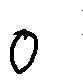

In [45]:
i

In [7]:
img.shape

(109, 120, 3)

In [68]:
a = [['Bog'], ['Chan'], ['Com'], ['Dhaka'], ['Tang']]

In [62]:
a.append([1,2])

In [10]:
import os
os.path.getsize('../croped/resized/process/fs2/0/1_Com_21_3_00021.jpg')

900

In [17]:
import os
import shutil
pathN = '../croped/resized/process/fs2/'
mainN = '../croped/resized/process/femaleScan/'
for i in range(0,120):
    path = pathN+str(i)+'/'
    main = mainN+str(i)+'/'
    dirs = os.listdir(path)
    for item in dirs:
        if os.path.isfile(path+item):
            x = os.path.getsize(path+item)
            if x < 830:
                shutil.move(path+item, "../err/"+str(i)+'/'+item)
                shutil.copy2(main+item, "../err/err1/"+str(i)+'/'+item)

In [15]:
# import os
# newpath = '../err/' 
# for i in range(120):
#     #if not os.path.exists(newpath):
#     os.makedirs(newpath+str(i)+'/')

In [17]:
import os


'C:\\Users\\shaha\\Desktop\\data processing\\DataProcessingScript'

In [52]:
import os
path='H:\/Final year project\/Suvrrajit\/dataset\/crop/'
path1='H:\/Final year project\/Suvrrajit\/FinalYearProject!\/Male data\/renameM/'
dirs = os.listdir(path1)

ar=[]
for i in range(0,100,1):
    ar.append(0)
for items in dirs:
    items = items.split('_')
    x=int(items[2])
    ar[x]=ar[x]+1

for i in range(0,30,1):
    print(str(i)+" = "+str(ar[i]*120))

0 = 0
1 = 120
2 = 0
3 = 0
4 = 0
5 = 0
6 = 0
7 = 0
8 = 120
9 = 1320
10 = 3960
11 = 6480
12 = 17520
13 = 21240
14 = 24720
15 = 28920
16 = 16320
17 = 15240
18 = 15720
19 = 2880
20 = 480
21 = 240
22 = 360
23 = 120
24 = 120
25 = 0
26 = 0
27 = 0
28 = 0
29 = 120


15
